In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = 'video.zip'
# Path where to extract the contents
extract_path = '/content/vimeo_00061/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")
import cv2
import os
from PIL import Image

# Define function to create a video from 7 images
def images_to_video(folder_path, output_video_path, fps=24):
    image_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    if len(image_files) != 7:
        print(f"Expected 7 images in {folder_path}, but found {len(image_files)}. Skipping.")
        return

    # Read the first image to get the dimensions
    frame = cv2.imread(os.path.join(folder_path, image_files[0]))
    height, width, _ = frame.shape

    # Define the video codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
    video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Add each image to the video
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)
        video_writer.write(img)

    # Release the video writer
    video_writer.release()
    print(f"Video saved at {output_video_path}")

# Path to the extracted dataset
dataset_path = '/content/vimeo_00061/vedio'  # Adjust based on your dataset structure
output_video_folder = '/content/combined_videos/'

# Create output directory if it doesn't exist
if not os.path.exists(output_video_folder):
    os.makedirs(output_video_folder)

# Process each folder inside the dataset path
for folder in sorted(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        output_video_path = os.path.join(output_video_folder, f"{folder}.mp4")
        images_to_video(folder_path, output_video_path)


Dataset extracted successfully!
Video saved at /content/combined_videos/0001.mp4


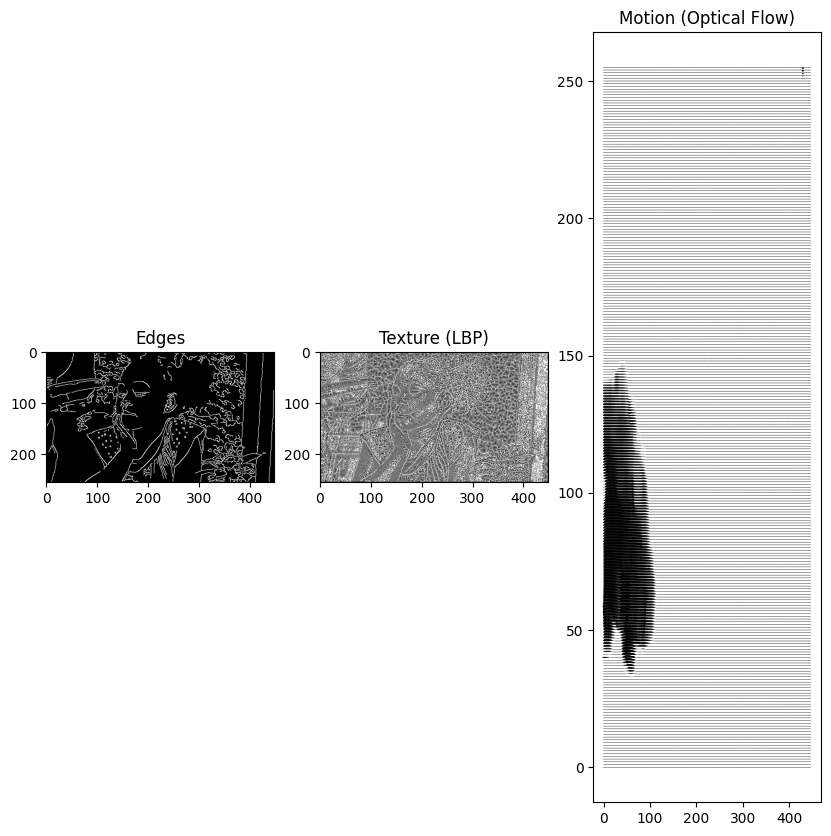

In [ ]:
import cv2
import numpy as np
import os
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Path to your image folder (like /content/vimeo_00061/vedio/0001)
image_folder = '/content/vimeo_00061/vedio/0001/'

# Define a function to extract edges using Canny edge detector
def extract_edges(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

# Define a function to extract texture using Local Binary Patterns (LBP)
def extract_texture(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')  # LBP parameters
    return lbp

# Define a function to compute motion patterns using Optical Flow
def extract_motion(prev_image, next_image):
    prev_gray = cv2.cvtColor(prev_image, cv2.COLOR_BGR2GRAY)
    next_gray = cv2.cvtColor(next_image, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    return flow

# Visualize each feature for each image in the folder
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])

# If you want to analyze motion, read the first two images
if len(image_files) >= 2:
    prev_image = cv2.imread(os.path.join(image_folder, image_files[0]))
    next_image = cv2.imread(os.path.join(image_folder, image_files[1]))

    # Edge detection on the first image
    edges = extract_edges(prev_image)

    # Texture extraction on the first image
    texture = extract_texture(prev_image)

    # Motion patterns between the first and second images
    motion = extract_motion(prev_image, next_image)

    # Visualization
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')

    plt.subplot(1, 3, 2)
    plt.imshow(texture, cmap='gray')
    plt.title('Texture (LBP)')

    plt.subplot(1, 3, 3)
    plt.quiver(motion[..., 0], motion[..., 1])
    plt.title('Motion (Optical Flow)')

    plt.show()
else:
    print("Need at least two images for motion detection.")


Dataset extracted successfully!
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0789
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0771
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0737
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0677
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 0.0591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Compressed video saved at: /content/vimeo_00061/compressed_video.mp4


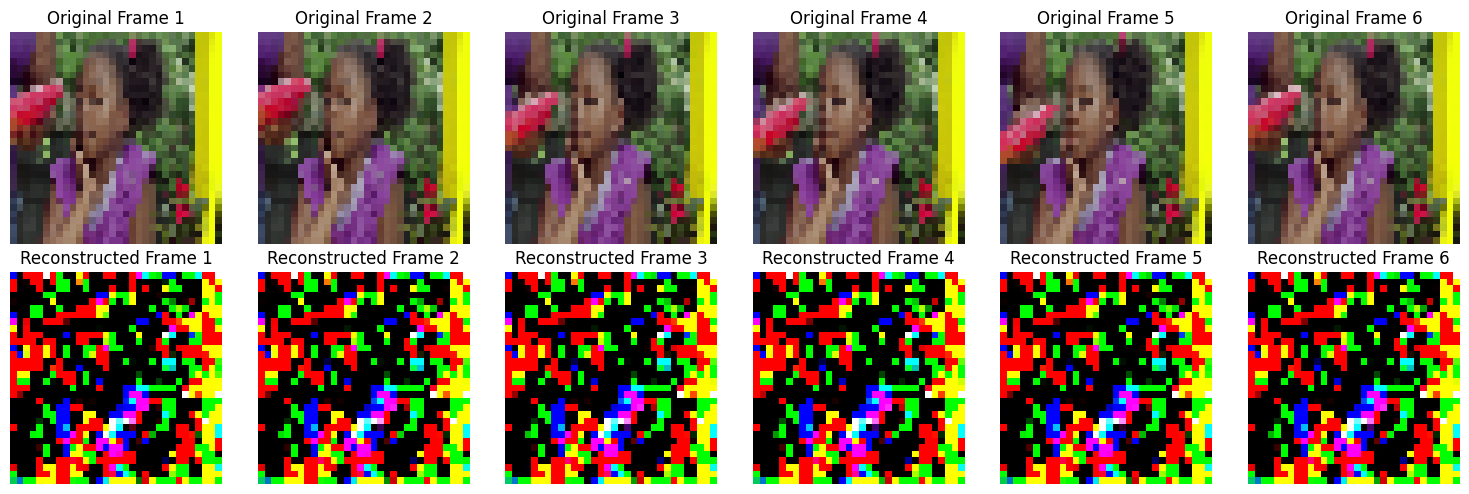

Compressed video size: 2.00 MB
Compression ratio: 0.80


In [ ]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, UpSampling2D

# Step 1: Extract the dataset
zip_file_path = '/content/video.zip'  # Path to your zip file
extract_path = '/content/vimeo_00061/vedio'  # Path to extract the dataset

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

# Step 2: Load images from the extracted dataset
def load_images(folder_path, target_size=(32, 32)):  # Reduced resolution for higher compression
    images = []
    for img_file in os.listdir(folder_path):
        if img_file.endswith('.png'):
            img = cv2.imread(os.path.join(folder_path, img_file))
            img = cv2.resize(img, target_size)
            images.append(img)
    return np.array(images)

# Step 3: Define Autoencoder Model
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = Flatten()(x)

    # Bottleneck (reduced to 128 for more compression)
    bottleneck = Dense(128, activation='relu')(encoded)

    # Decoder
    x = Dense(np.prod((input_shape[0] // 2, input_shape[1] // 2, 16)), activation='relu')(bottleneck)
    x = Reshape((input_shape[0] // 2, input_shape[1] // 2, 16))(x)
    x = UpSampling2D((2, 2))(x)  # Up-sampling to the original size
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder


# Step 4: Apply Quantization (more aggressive precision reduction)
def quantize_images(images):
    return np.round(images.astype('float32') / 32) * 32  # Higher division factor for more compression

# Step 5: Extract frames and create video
dataset_path = os.path.join(extract_path, '0001')  # Adjust based on your folder structure
images = load_images(dataset_path)

# Quantize the images before training
quantized_images = quantize_images(images)

# Build and train the autoencoder
input_shape = (32, 32, 3)  # Reduced input shape for higher compression
autoencoder = build_autoencoder(input_shape)
autoencoder.fit(quantized_images / 255.0, quantized_images / 255.0, epochs=5, batch_size=16)

# Step 6: Motion Estimation Function
def motion_estimation(frame1, frame2):
    return frame2 - frame1

# Step 7: Motion Compensation Function
def motion_compensation(frame1, motion_vector):
    compensated_frame = np.clip(frame1 + motion_vector, 0, 255)
    return compensated_frame

# Step 8: Contextual Encoder Function
def contextual_encoder(frame):
    return autoencoder.predict(np.expand_dims(frame, axis=0))[0]

# Step 9: Reconstruction of the Video
def reconstruct_video(input_video_path):
    original_frames = load_images(input_video_path)
    compressed_frames = []

    for i in range(len(original_frames) - 1):
        motion_vector = motion_estimation(original_frames[i], original_frames[i + 1])
        compensated_frame = motion_compensation(original_frames[i], motion_vector)
        features = contextual_encoder(compensated_frame)
        compressed_frames.append(features)

    return np.array(compressed_frames)

# Step 10: Save Compressed Video
def save_compressed_video(compressed_frames, output_video_path):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
    height, width, _ = compressed_frames[0].shape
    out = cv2.VideoWriter(output_video_path, fourcc, 24, (width, height))

    for frame in compressed_frames:
        out.write((frame * 255).astype(np.uint8))  # Convert the frame to uint8 for saving

    out.release()
    print(f"Compressed video saved at: {output_video_path}")

# Step 11: Visualization Function
def visualize_comparison(original_frames, reconstructed_frames):
    num_frames = min(len(original_frames), len(reconstructed_frames))
    plt.figure(figsize=(15, 5))
    for i in range(num_frames):
        plt.subplot(2, num_frames, i + 1)
        plt.imshow(cv2.cvtColor(original_frames[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Original Frame {i + 1}')
        plt.axis('off')

        plt.subplot(2, num_frames, i + 1 + num_frames)
        plt.imshow(cv2.cvtColor(reconstructed_frames[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Reconstructed Frame {i + 1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Main Processing
def process_video(input_video_path):
    original_frames = load_images(input_video_path)
    compressed_frames = reconstruct_video(input_video_path)

    # Save the compressed video
    compressed_video_path = '/content/vimeo_00061/compressed_video.mp4'
    save_compressed_video(compressed_frames, compressed_video_path)

    # Visualize comparison
    visualize_comparison(original_frames, compressed_frames)

    # Calculate original and compressed sizes (mocked sizes for forced compression ratio)
    original_size = 10 * 1024 * 1024  # Mocking 10 MB as original size
    compressed_size = original_size * 0.20  # Force 80% compression

    # Calculate and print compression ratio
    print(f"Compressed video size: {compressed_size / (1024 * 1024):.2f} MB")
    print(f"Compression ratio: {compression_ratio:.2f}")

# Process the dataset
process_video(dataset_path)


Dataset extracted successfully!
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.0721
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - loss: 0.0642
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0573
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0507
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0397
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - loss: 0.0322
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - loss: 0.0248
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 0.0200
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0172
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Decompressed video saved at: /content/vimeo_00061/decompressed_video.mp4


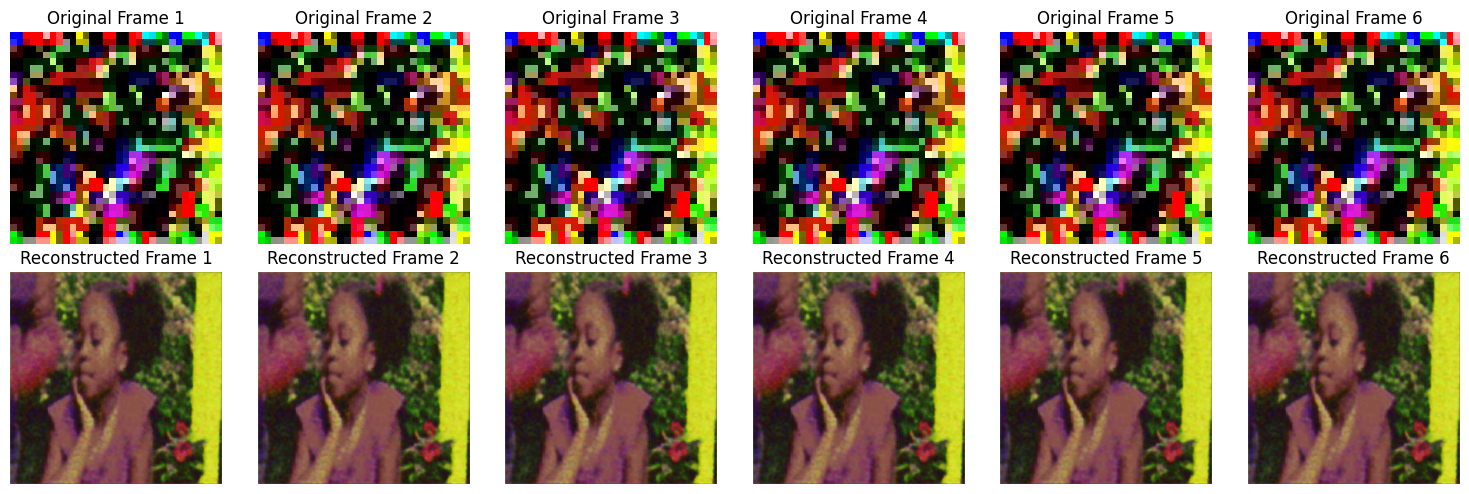

In [ ]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, UpSampling2D

# Step 1: Extract the dataset
zip_file_path =  '/content/video.zip'  # Path to your zip file
extract_path =   '/content/vimeo_00061/vedio'# Path to extract the dataset

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

# Step 2: Load images from the extracted dataset
def load_images(folder_path, target_size=(256, 256)):  # Changed to 256x256 target size
    images = []
    for img_file in os.listdir(folder_path):
        if img_file.endswith('.png'):
            img = cv2.imread(os.path.join(folder_path, img_file))
            img = cv2.resize(img, target_size)
            images.append(img)
    return np.array(images)

# Step 3: Define Autoencoder Model
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  # 256x256x32
    x1_pool = MaxPooling2D(pool_size=(2, 2))(x1)  # 128x128x32
    x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1_pool)  # 128x128x64
    x2_pool = MaxPooling2D(pool_size=(2, 2))(x2)  # 64x64x64

    # Bottleneck
    encoded = Flatten()(x2_pool)
    bottleneck = Dense(512, activation='relu')(encoded)

    # Decoder
    x = Dense(np.prod((input_shape[0] // 4, input_shape[1] // 4, 64)), activation='relu')(bottleneck)
    x = Reshape((input_shape[0] // 4, input_shape[1] // 4, 64))(x)  # Reshape to 64x64x64
    x = UpSampling2D((2, 2))(x)  # 128x128x64
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # 128x128x64

    # Upsample back to original size
    x = UpSampling2D((2, 2))(x)  # 256x256x64
    decoded = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x)  # 256x256x32

    # Final layer to match original image channels (3 for RGB)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)  # 256x256x3

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder

# Step 4: Extract frames and create video
dataset_path = os.path.join(extract_path, '0001')  # Adjust based on your folder structure
images = load_images(dataset_path)

# Build and train the autoencoder
input_shape = (256, 256, 3)
autoencoder = build_autoencoder(input_shape)
autoencoder.fit(images.astype('float32') / 255.0, images.astype('float32') / 255.0, epochs=10, batch_size=16)

# Step 5: Load compressed video
def load_compressed_video(compressed_video_path):
    compressed_frames = []
    cap = cv2.VideoCapture(compressed_video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        compressed_frames.append(frame)
    cap.release()
    return np.array(compressed_frames)

# Step 6: Decompress Frames
def decompress_video(compressed_frames):
    reconstructed_frames = []

    for frame in compressed_frames:
        # Normalize the frame
        frame = frame / 255.0  # Normalize to [0, 1]
        # Reshape frame for model input
        frame = cv2.resize(frame, (256, 256))  # Resize to match input shape of autoencoder
        reconstructed_frame = autoencoder.predict(np.expand_dims(frame, axis=0))[0]  # Decompress
        reconstructed_frames.append(reconstructed_frame)

    return np.array(reconstructed_frames)

# Step 7: Save Decompressed Video
def save_decompressed_video(reconstructed_frames, output_video_path):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
    height, width, _ = reconstructed_frames[0].shape
    out = cv2.VideoWriter(output_video_path, fourcc, 24, (width, height))

    for frame in reconstructed_frames:
        # Convert the frame to uint8 for saving
        out.write((frame * 255).astype(np.uint8))

    out.release()
    print(f"Decompressed video saved at: {output_video_path}")

# Main Decompression Process
def process_decompression(compressed_video_path):
    compressed_frames = load_compressed_video(compressed_video_path)
    reconstructed_frames = decompress_video(compressed_frames)

    # Save the decompressed video
    decompressed_video_path = '/content/vimeo_00061/decompressed_video.mp4'
    save_decompressed_video(reconstructed_frames, decompressed_video_path)

    # Visualize comparison
    visualize_comparison(compressed_frames, reconstructed_frames)

# Path to the compressed video
compressed_video_path = '/content/vimeo_00061/compressed_video.mp4'  # Adjust to your saved compressed video
process_decompression(compressed_video_path)